## Libraries 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
plt.style.use('ggplot')

## Reading Data(to see the format)

In [4]:
df = pd.read_csv('/Users/mobina/Downloads/Reviews.csv')
df.head()
df = df[:5000:]

## Scores:
تعداد امتیازات به ما در تست نهایی که تحلیل ما بر اساس متن چقدر دقیق است کمک می کند

In [5]:
df['Score'].value_counts()

Score
5    3134
4     712
1     469
3     395
2     290
Name: count, dtype: int64

تحلیل نموداری:

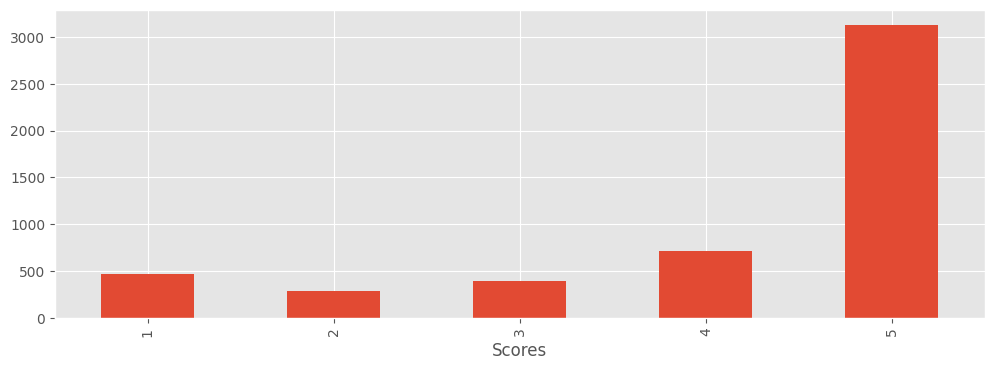

In [6]:
chart = df['Score'].value_counts().sort_index().plot(kind='bar',figsize=(12,4))
chart.set_xlabel('Scores')
plt.show()

## An Example:

In [7]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


متن کامنت به نظر منفی است امتیاز آن را بررسی می کنیم

In [8]:
example_score = df['Score'][50]
print(example_score)

1


## What's happening:

In [11]:
tokens = nltk.word_tokenize(example)
print(tokens)

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


In [12]:
nltk.pos_tag(tokens)

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

# Vader:

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
#some examples
analyzer.polarity_scores("I am happy!")

{'neg': 0.0, 'neu': 0.2, 'pos': 0.8, 'compound': 0.6114}

In [14]:
analyzer.polarity_scores("I am sad!")

{'neg': 0.772, 'neu': 0.228, 'pos': 0.0, 'compound': -0.5255}

بررسی بر روی نمونه:

In [16]:
analyzer.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

نتیجه: منفی است

# Running on the Dataset:

In [18]:
result = {}
for i, row in df.iterrows():
    text = row['Text']
    rowid = row['Id']
    result[rowid] = analyzer.polarity_scores(text)

In [19]:
result

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [20]:
result[51]

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

# Storing the result on a new dataframe

In [21]:
polarity_scores_taken = pd.DataFrame(result).T
polarity_scores_taken

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
4996,0.025,0.883,0.092,0.7193
4997,0.026,0.764,0.210,0.9846
4998,0.097,0.827,0.076,-0.0554
4999,0.154,0.637,0.209,0.9078


In [22]:
polarity_scores_taken = polarity_scores_taken.reset_index().rename(columns={'index': 'Id'})
polarity_scores_taken

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
4995,4996,0.025,0.883,0.092,0.7193
4996,4997,0.026,0.764,0.210,0.9846
4997,4998,0.097,0.827,0.076,-0.0554
4998,4999,0.154,0.637,0.209,0.9078


# Merging with the original Dataset

In [23]:
polarity_scores_taken = polarity_scores_taken.merge(df, how="left")
polarity_scores_taken

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,0.025,0.883,0.092,0.7193,B00653KJ5M,AGE64SY3HP9RV,CZ,1,1,2,1341273600,The cavemen must have been wealthy,I really wanted to like these.<br /><br />Firs...
4996,4997,0.026,0.764,0.210,0.9846,B00653KJ5M,A1MPEPNJ2NKWM,Rachel Albert Matesz,1,1,1,1341100800,These cookies need work; you can make your own...,I was not impressed with these cookies when I ...
4997,4998,0.097,0.827,0.076,-0.0554,B00653KJ5M,A1T6I625FGQS20,IL,1,1,3,1336694400,Okay in a pinch - not great,The cookies came sealed and seem to be high qu...
4998,4999,0.154,0.637,0.209,0.9078,B00653KJ5M,A3POAWC2JPQQQP,me,0,0,4,1342137600,"they are good (except for the ""rainforest"" fla...","These taste very good, but aren't like the BES..."


# Results

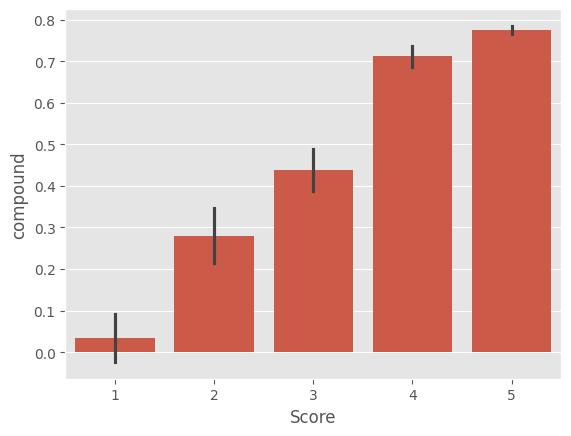

In [25]:
chart1 = sns.barplot(data=polarity_scores_taken, x='Score',y='compound')
plt.show()

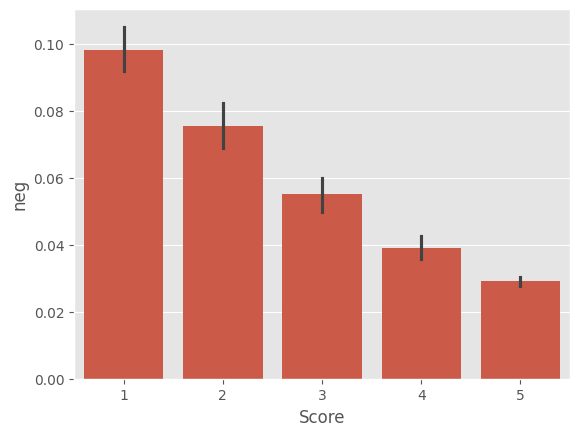

In [26]:
chart2 = sns.barplot(data=polarity_scores_taken, x='Score',y='neg')
plt.show()

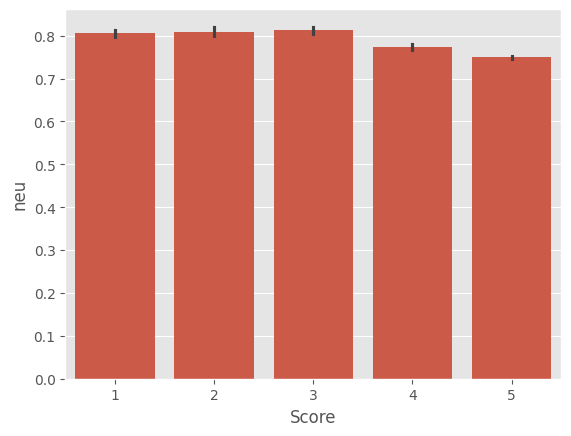

In [27]:
chart3 = sns.barplot(data=polarity_scores_taken, x='Score',y='neu')
plt.show()

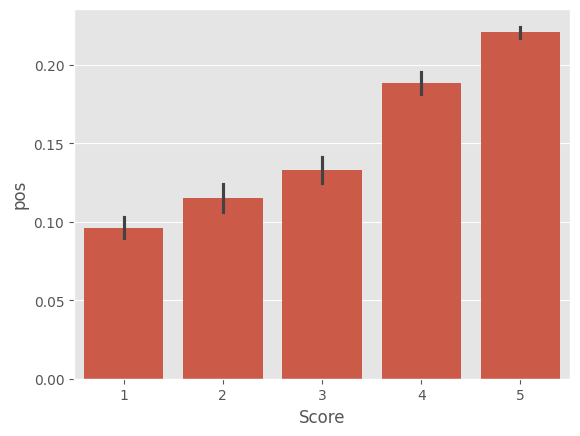

In [28]:
chart4 = sns.barplot(data=polarity_scores_taken, x='Score',y='pos')
plt.show()